In [1]:
'''
Load the AllState training data.
Each row consists of one index, 116 categorical predictors, 14 continuous 
predictors, and one continuous response variable called loss.
'''
import pandas as pd
import numpy as np

df0 = pd.read_csv("data/train.csv", delimiter=",", header=0, index_col=0)
print("Shape of training data frame: %s\n" %(df0.shape,))

Shape of training data frame: (188318, 131)




Loss distribution: 
count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64


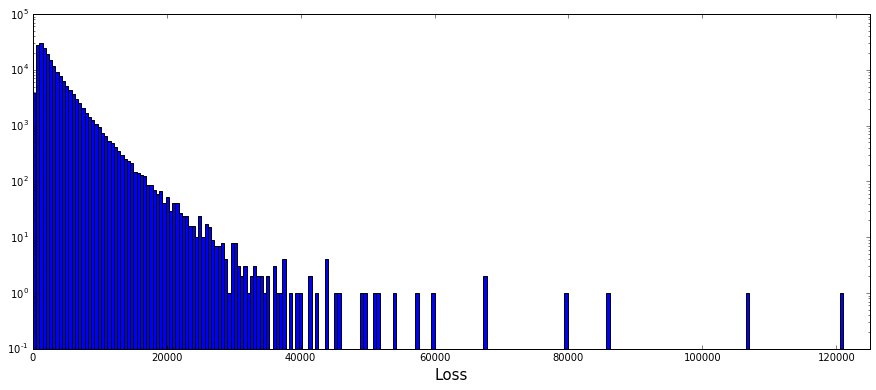


Log-loss distribution: 
count    188318.000000
mean          7.685268
std           0.811868
min          -0.400478
25%           7.093787
50%           7.657080
75%           8.259470
max          11.703647
Name: loss, dtype: float64


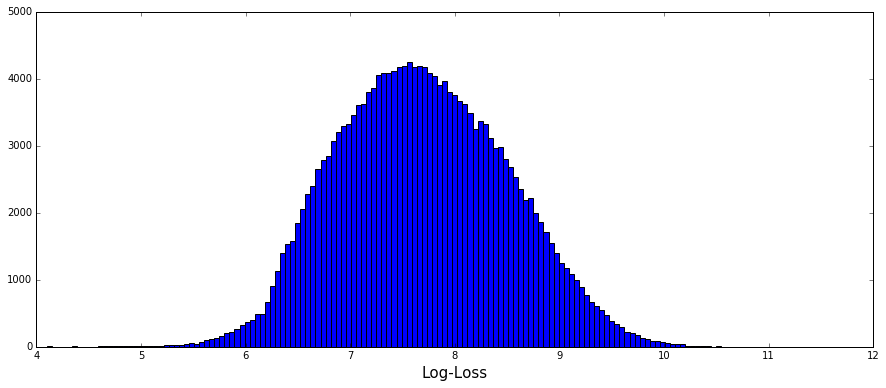

In [2]:
'''
Plot the response variable.
'''
%matplotlib inline
import matplotlib.pyplot as plt

print("\nLoss distribution: \n%s" %df0["loss"].describe())
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,6) )
axes.hist(df0["loss"], bins=250)
axes.set_xlabel("Loss", fontsize=15)
axes.set_xlim([0.0, 125000.0])
axes.set_ylim([0.1, 100000.0])
axes.set_yscale("log")
plt.show()
fig.savefig('Loss.png', dpi=200, bbox_inches='tight')

print("\nLog-loss distribution: \n%s" %np.log(df0["loss"]).describe())
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,6) )
axes.hist(np.log(df0["loss"]), bins=250)
axes.set_xlabel("Log-Loss", fontsize=15)
axes.set_xlim([4.0, 12.0])
axes.set_ylim([0.0, 5000.0])
axes.set_yscale("linear")
plt.show()
fig.savefig('LogLoss.png', dpi=200, bbox_inches='tight')


cont1 distribution: 
count    188318.000000
mean          0.493861
std           0.187640
min           0.000016
25%           0.346090
50%           0.475784
75%           0.623912
max           0.984975
Name: cont1, dtype: float64


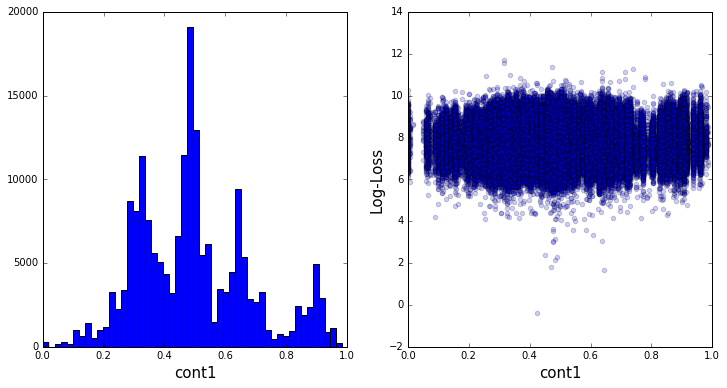


cont2 distribution: 
count    188318.000000
mean          0.507188
std           0.207202
min           0.001149
25%           0.358319
50%           0.555782
75%           0.681761
max           0.862654
Name: cont2, dtype: float64


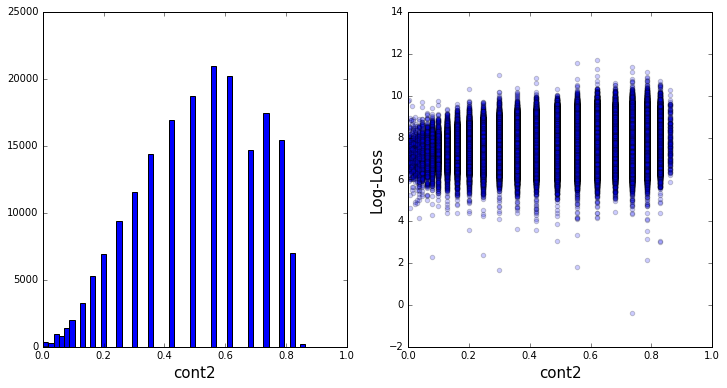


cont3 distribution: 
count    188318.000000
mean          0.498918
std           0.202105
min           0.002634
25%           0.336963
50%           0.527991
75%           0.634224
max           0.944251
Name: cont3, dtype: float64


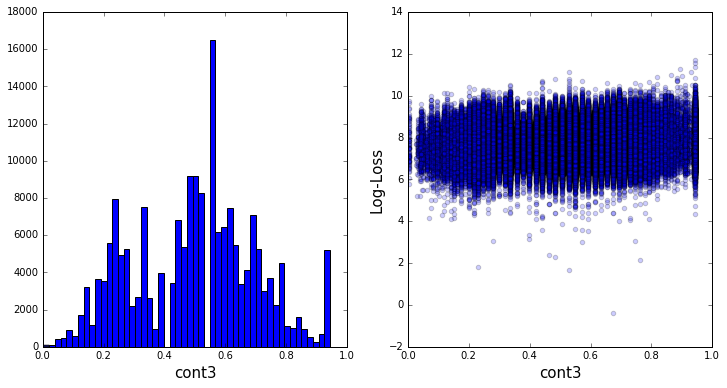


cont4 distribution: 
count    188318.000000
mean          0.491812
std           0.211292
min           0.176921
25%           0.327354
50%           0.452887
75%           0.652072
max           0.954297
Name: cont4, dtype: float64


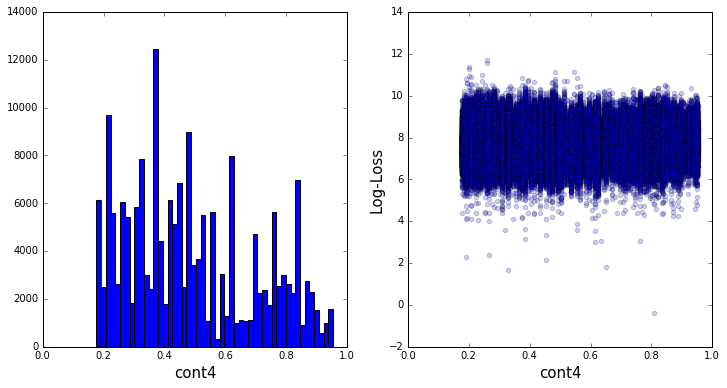


cont5 distribution: 
count    188318.000000
mean          0.487428
std           0.209027
min           0.281143
25%           0.281143
50%           0.422268
75%           0.643315
max           0.983674
Name: cont5, dtype: float64


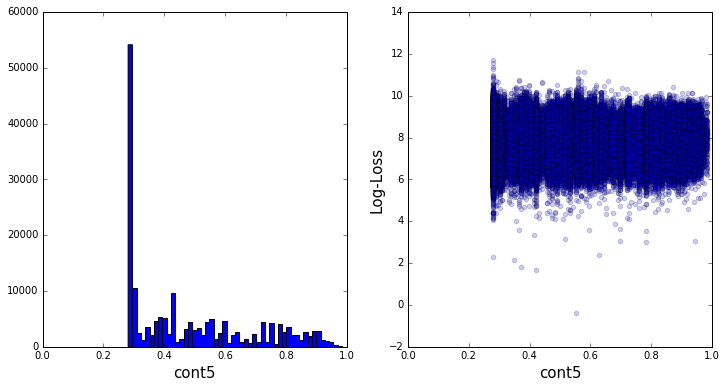


cont6 distribution: 
count    188318.000000
mean          0.490945
std           0.205273
min           0.012683
25%           0.336105
50%           0.440945
75%           0.655021
max           0.997162
Name: cont6, dtype: float64


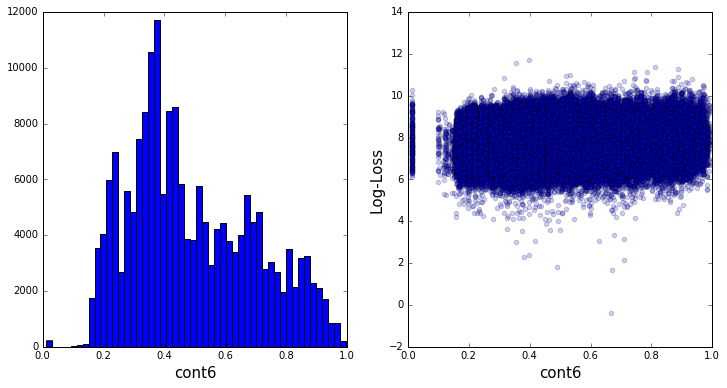


cont7 distribution: 
count    188318.000000
mean          0.484970
std           0.178450
min           0.069503
25%           0.350175
50%           0.438285
75%           0.591045
max           1.000000
Name: cont7, dtype: float64


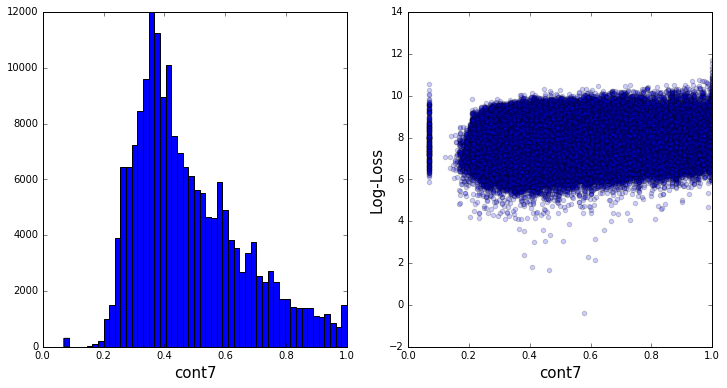


cont8 distribution: 
count    188318.000000
mean          0.486437
std           0.199370
min           0.236880
25%           0.312800
50%           0.441060
75%           0.623580
max           0.980200
Name: cont8, dtype: float64


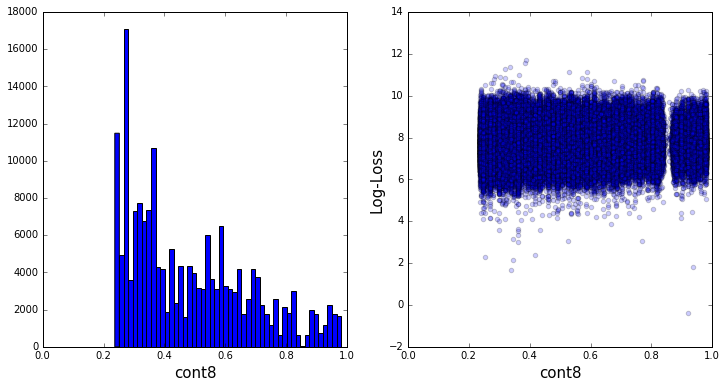


cont9 distribution: 
count    188318.000000
mean          0.485506
std           0.181660
min           0.000080
25%           0.358970
50%           0.441450
75%           0.566820
max           0.995400
Name: cont9, dtype: float64


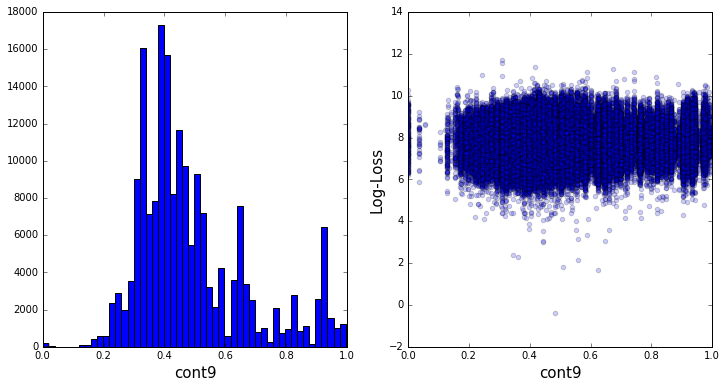


cont10 distribution: 
count    188318.000000
mean          0.498066
std           0.185877
min           0.000000
25%           0.364580
50%           0.461190
75%           0.614590
max           0.994980
Name: cont10, dtype: float64


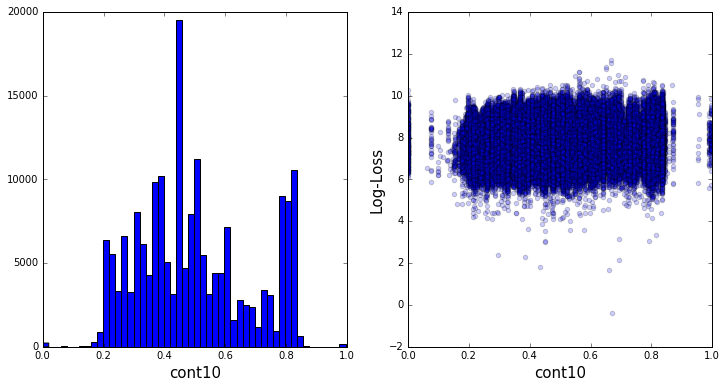


cont11 distribution: 
count    188318.000000
mean          0.493511
std           0.209737
min           0.035321
25%           0.310961
50%           0.457203
75%           0.678924
max           0.998742
Name: cont11, dtype: float64


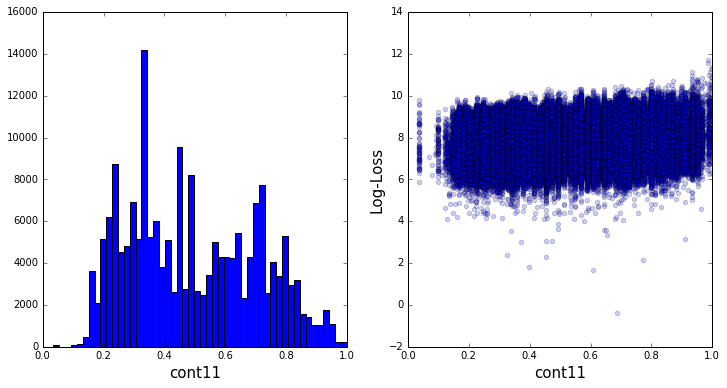


cont12 distribution: 
count    188318.000000
mean          0.493150
std           0.209427
min           0.036232
25%           0.311661
50%           0.462286
75%           0.675759
max           0.998484
Name: cont12, dtype: float64


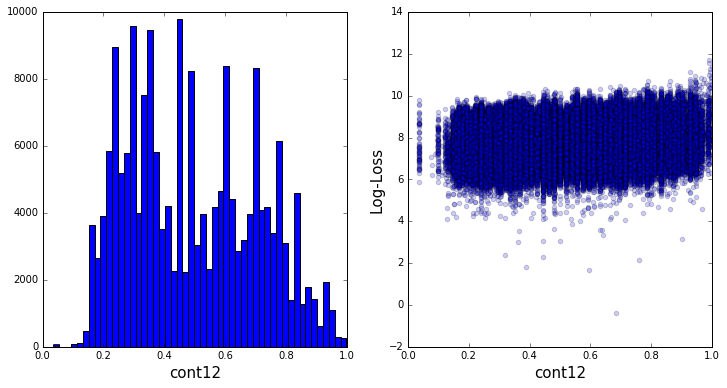


cont13 distribution: 
count    188318.000000
mean          0.493138
std           0.212777
min           0.000228
25%           0.315758
50%           0.363547
75%           0.689974
max           0.988494
Name: cont13, dtype: float64


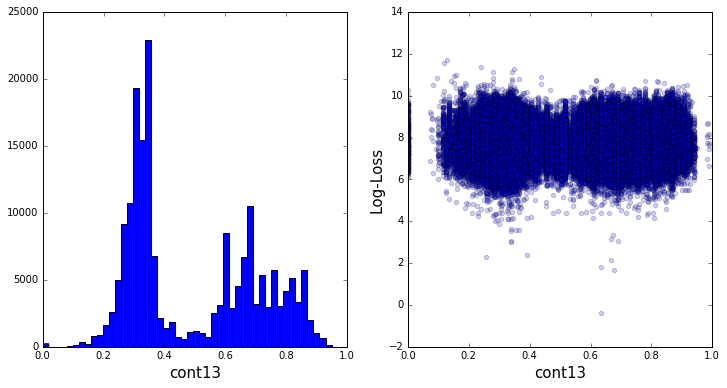


cont14 distribution: 
count    188318.000000
mean          0.495717
std           0.222488
min           0.179722
25%           0.294610
50%           0.407403
75%           0.724623
max           0.844848
Name: cont14, dtype: float64


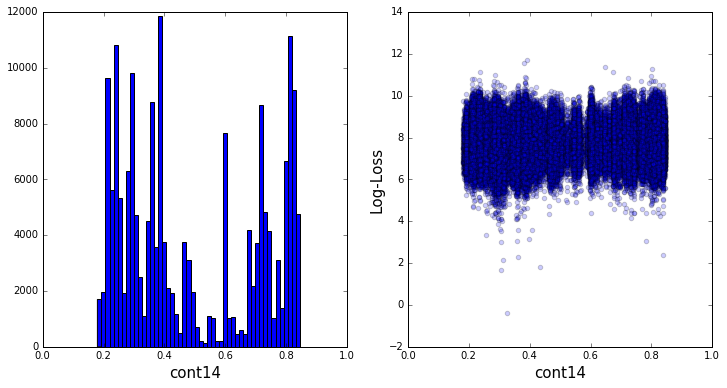

In [19]:
'''
Let's plot the 14 continuous predictors.
All of these predictors range between 0 and 1.
'''
varlist = ["cont{0}".format(ind) for ind in range(1,15)]
for var in varlist:
    print("\n%s distribution: \n%s" %(var,df0[var].describe()))
    fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(12,6) )
    axes[0].hist(df0[var], bins=50)
    axes[0].set_xlabel(var, fontsize=15)
    axes[0].set_xlim([0.0, 1.0])
    axes[1].scatter(df0[var], np.log(df0["loss"]), alpha=0.2)
    axes[1].set_xlabel(var, fontsize=15)
    axes[1].set_ylabel("Log-Loss", fontsize=15)
    axes[1].set_xlim([0.0, 1.0])
    plt.show()


In [21]:
'''
Let's take a look at the categorical variables.
The number of values a categorical variable takes here is between 2 and 326.
'''
catlist  = ["cat{0}".format(ind) for ind in range(1,117)]
ndummies = 0
for var in catlist:
    values = sorted(df0[var].unique())
    ndummies += len(values)-1
    cnt_df = df0.groupby([var])["loss"].count()
    cnt_dy = {label: cnt_df[label] for label in values}
    print("\n{0}, {2} levels: {1}".format(var,cnt_dy,len(values)))
print("\nEquivalent number of dummy variables: {0}".format(ndummies))


cat1, 2 levels: {'A': 141550, 'B': 46768}

cat2, 2 levels: {'A': 106721, 'B': 81597}

cat3, 2 levels: {'A': 177993, 'B': 10325}

cat4, 2 levels: {'A': 128395, 'B': 59923}

cat5, 2 levels: {'A': 123737, 'B': 64581}

cat6, 2 levels: {'A': 131693, 'B': 56625}

cat7, 2 levels: {'A': 183744, 'B': 4574}

cat8, 2 levels: {'A': 177274, 'B': 11044}

cat9, 2 levels: {'A': 113122, 'B': 75196}

cat10, 2 levels: {'A': 160213, 'B': 28105}

cat11, 2 levels: {'A': 168186, 'B': 20132}

cat12, 2 levels: {'A': 159825, 'B': 28493}

cat13, 2 levels: {'A': 168851, 'B': 19467}

cat14, 2 levels: {'A': 186041, 'B': 2277}

cat15, 2 levels: {'A': 188284, 'B': 34}

cat16, 2 levels: {'A': 181843, 'B': 6475}

cat17, 2 levels: {'A': 187009, 'B': 1309}

cat18, 2 levels: {'A': 187331, 'B': 987}

cat19, 2 levels: {'A': 186510, 'B': 1808}

cat20, 2 levels: {'A': 188114, 'B': 204}

cat21, 2 levels: {'A': 187905, 'B': 413}

cat22, 2 levels: {'A': 188275, 'B': 43}

cat23, 2 levels: {'A': 157445, 'B': 30873}

cat24, 2 leve

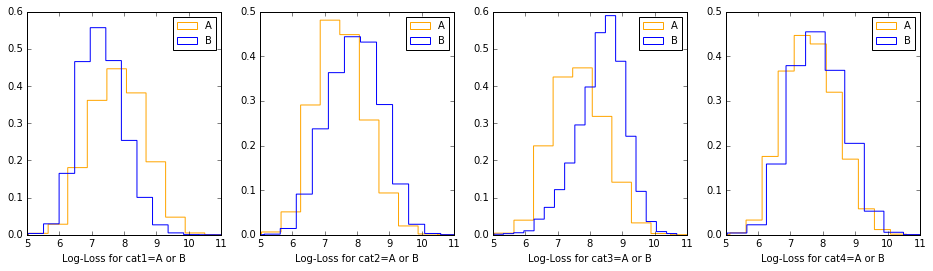

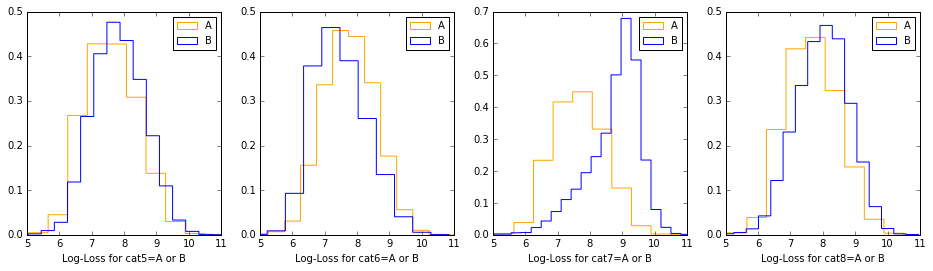

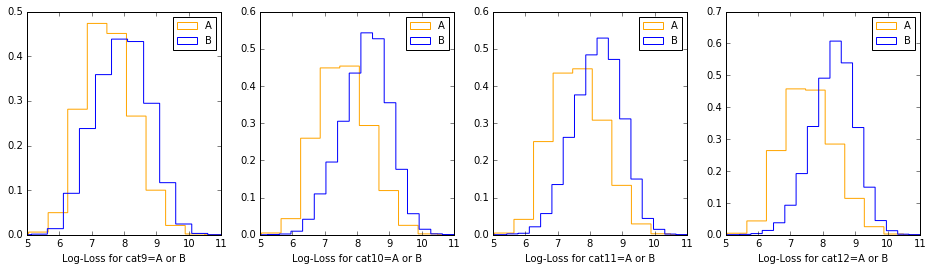

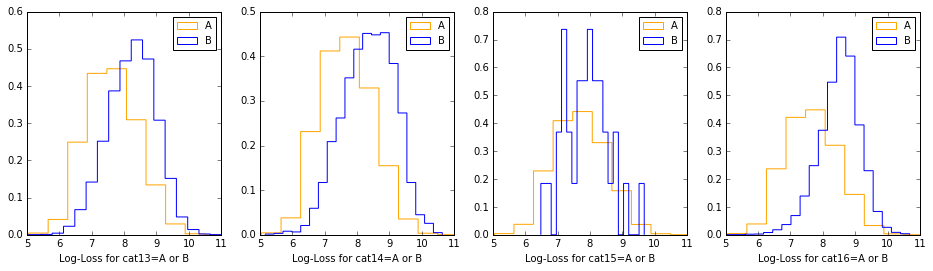

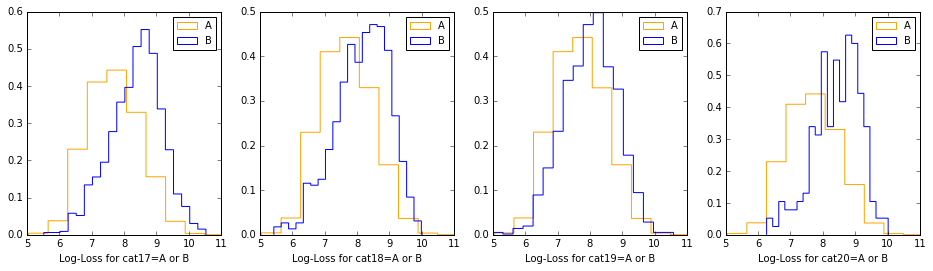

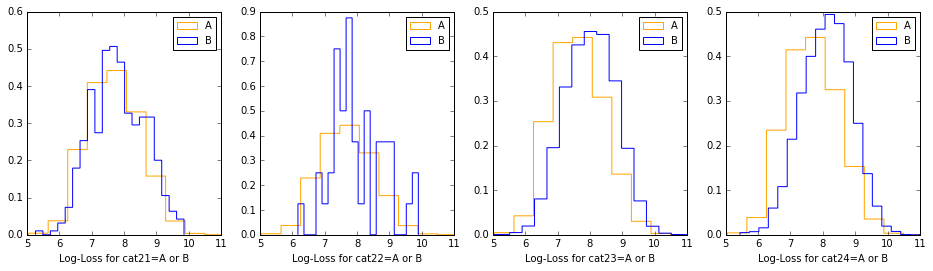

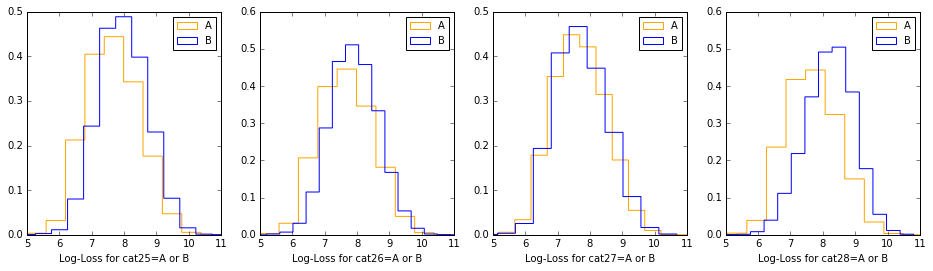

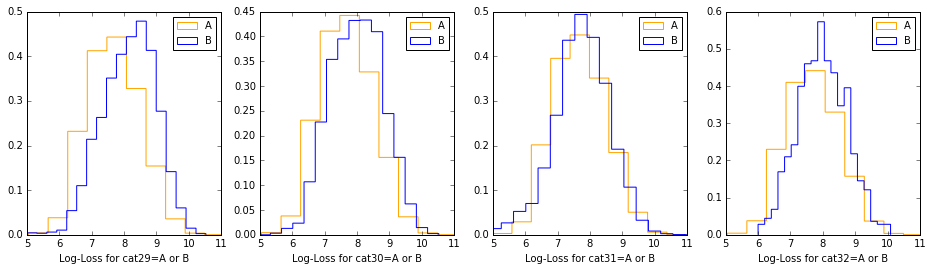

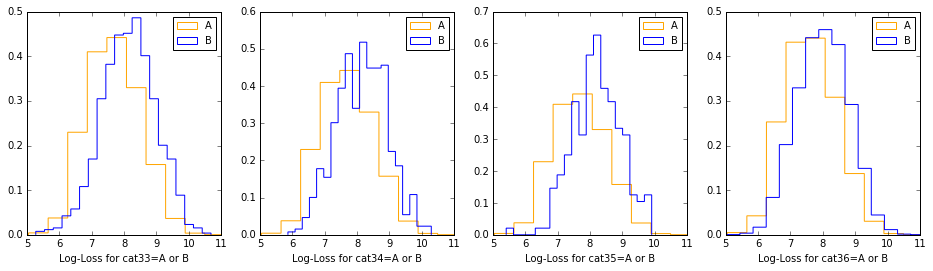

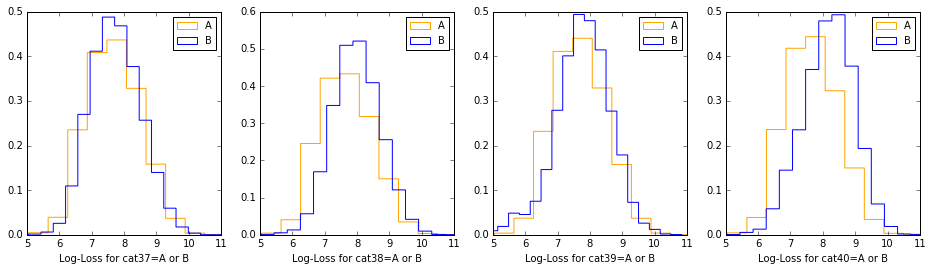

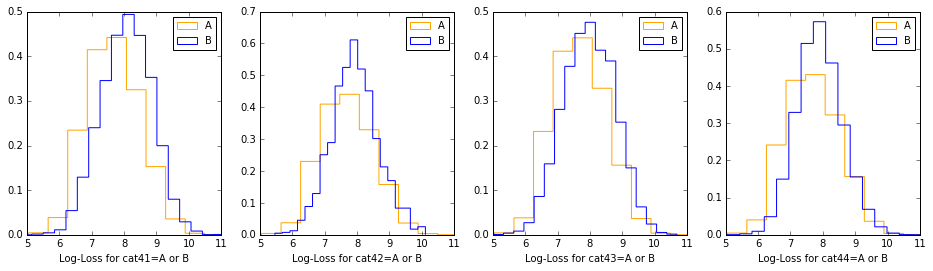

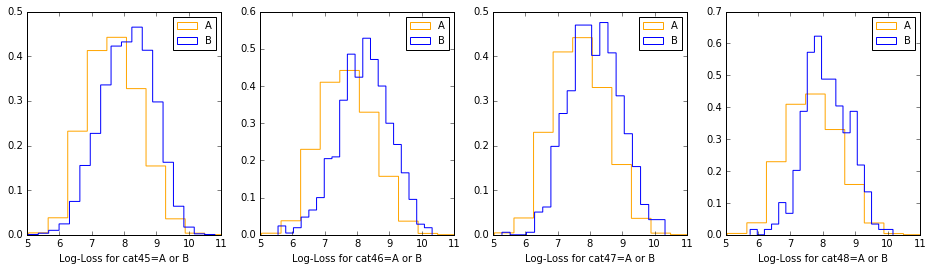

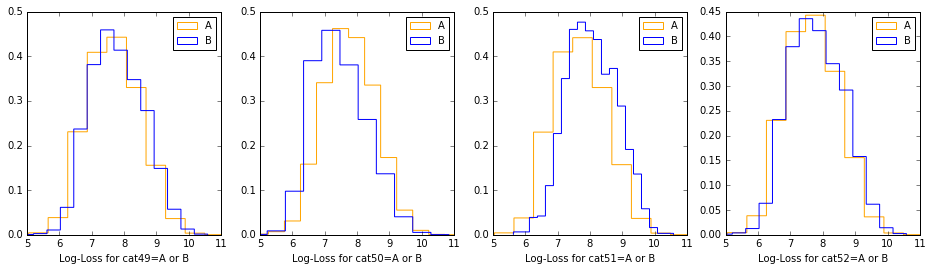

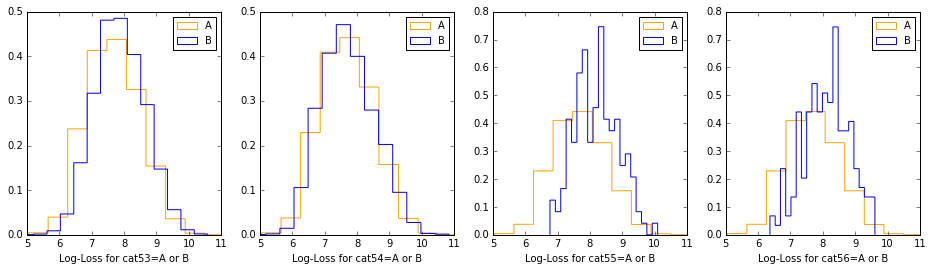

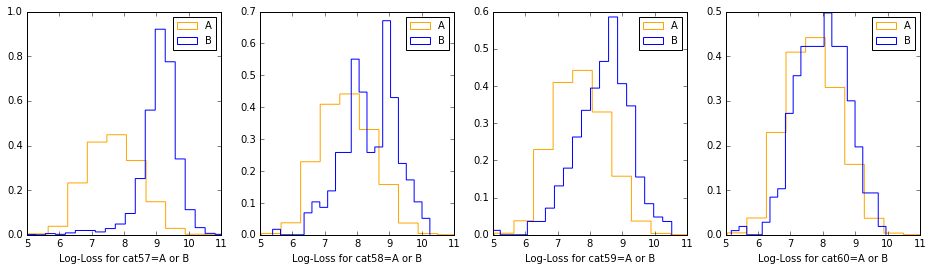

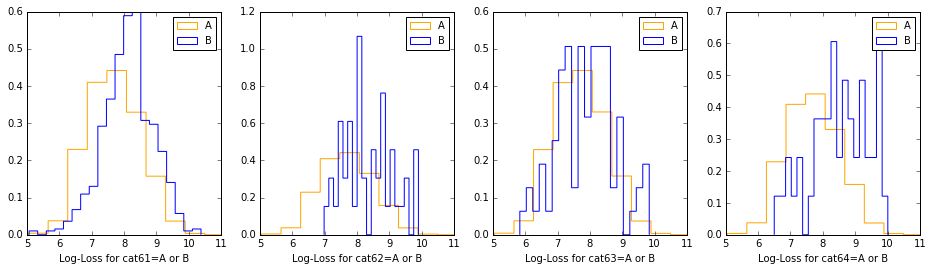

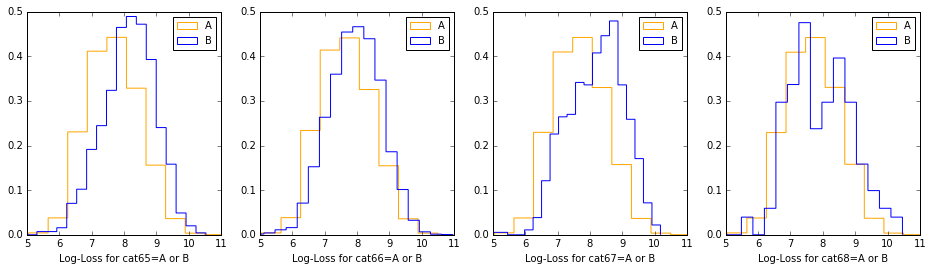

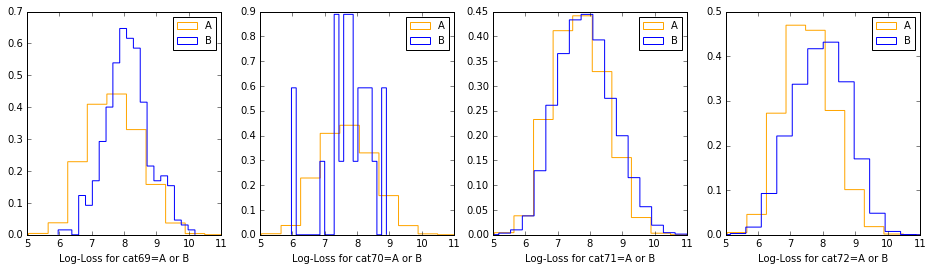

In [5]:
'''
Categorical variables cat1 through cat72 are binary. 
Let's look at how they affect the log-loss distribution.
'''
Acol = ["orange"]
Bcol = ["blue"]

rowlist = [["cat{0}".format(ind) for ind in range(jnd,jnd+4)] for jnd in range(1,70,4)]
for row in rowlist:
    fig, axes = plt.subplots( nrows=1, ncols=4, figsize=(16,4) )
    plt.subplots_adjust( wspace=0.20, hspace=0.20 )
    for (ind,cat) in enumerate(row):
        cat_filter = df0[cat] == "A"
        axes[ind].hist(np.log(df0[cat_filter]["loss"]), bins=20,
                       color=Acol, histtype="step", label="A", normed=True)
        axes[ind].hist(np.log(df0[~cat_filter]["loss"]), bins=20,
                       color=Bcol, histtype="step", label="B", normed=True)
        axes[ind].set_xlabel("Log-Loss for "+cat+"=A or B")
        axes[ind].set_xlim([5.0,11.0])
        axes[ind].legend(prop={'size': 10},loc="upper right")
    plt.show()

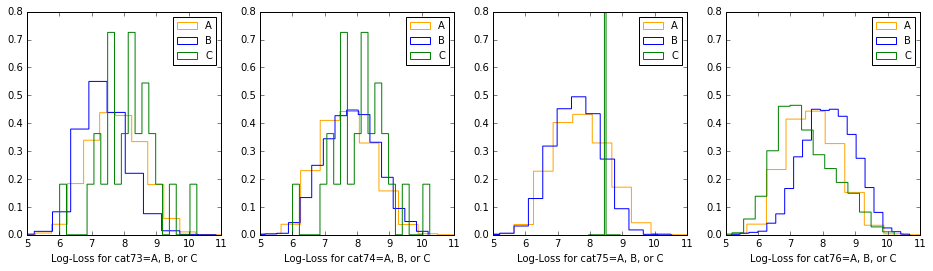

In [10]:
'''
Categorical variables cat73 through cat76 are ternary. 
Let's look at how they affect the log-loss distribution.
'''
Acol = ["orange"]
Bcol = ["blue"]
Ccol = ["green"]

row  = ["cat{0}".format(ind) for ind in range(73,77)]
fig, axes = plt.subplots( nrows=1, ncols=4, figsize=(16,4) )
plt.subplots_adjust( wspace=0.20, hspace=0.20 )
for (ind,cat) in enumerate(row):
    A_filter = df0[cat] == "A"
    B_filter = df0[cat] == "B"
    C_filter = df0[cat] == "C"
    axes[ind].hist(np.log(df0[A_filter]["loss"]), bins=20,
                   color=Acol, histtype="step", label="A", normed=True)
    axes[ind].hist(np.log(df0[B_filter]["loss"]), bins=20,
                   color=Bcol, histtype="step", label="B", normed=True)
    axes[ind].hist(np.log(df0[C_filter]["loss"]), bins=20,
                   color=Ccol, histtype="step", label="C", normed=True)
    axes[ind].set_xlabel("Log-Loss for "+cat+"=A, B, or C")
    axes[ind].set_xlim([5.0,11.0])
    axes[ind].set_ylim([0.0,0.8])
    axes[ind].legend(prop={'size': 10},loc="upper right")
plt.show()

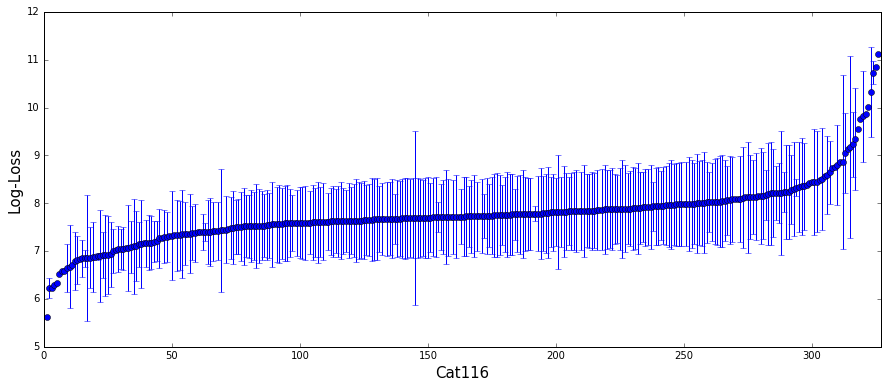

In [28]:
'''
The predictor cat116 has 326 values. Here we make a plot to show the discriminating power of this predictor.
'''
df1 = df0[["cat116"]]
df1.loc[:,"log-loss"] = np.log(df0.loc[:,"loss"])
grouped = df1.groupby(["cat116"])
xval = grouped.count().index.tolist()
yavg = grouped.mean()["log-loss"].tolist()
ystd = grouped.std()["log-loss"].tolist()
yavg,ystd,xval = (list(t) for t in zip(*sorted(zip(yavg,ystd,xval))))
xnum = np.arange(1,len(xval)+1)

fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,6) )
axes.errorbar(xnum, yavg, yerr=ystd, fmt='o')
axes.set_xlabel("Cat116", fontsize=15)
axes.set_xlim([0.0,327.0])
axes.set_ylabel("Log-Loss", fontsize=15)
plt.show()